In [1]:
from random import random
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statistics import mean 
from scipy.stats import bernoulli

In [2]:
def multiplicative_congruential_method(a, b, m, n):
    for _ in range(n):
        a = (a * b) % m
        yield a / m  

In [18]:
n = 1000
eps = 0.05
p_bernoulli = 0.7
p = 0.7
m = 5

# for mcm
a = 131075.0
b = 131075.0
M = 2.0 ** 31

def bernoulli_with_mcm(p):
    return [0 if element > p else 1 for element in list(multiplicative_congruential_method(a, b, M, n))]


def bernoulli_with_random(p):
    return [0 if element > p else 1 for element in list(random() for _ in range(n))]


def bernoulli_mean_theory():
    return p

def mean_real(seq):
    return sum(seq) / len(seq)

def bernoulli_variance_theory():
    return p * (1 - p)

def variance_real(seq):
    sum = 0
    mean = mean_real(seq)

    for el in seq:
        sum += (el - mean) ** 2
    return  1 / (len(seq) - 1) * sum

def bernoulli_kurtosis_theory():
    return (6 * p **2 - 6 * p + 1) / (p * (1 - p))
                                                
def bernoulli_skewness_theory():
    q = 1 - p
    return (q - p) / (math.sqrt(p * q))  

def skewness_real(seq):
    m = mean_real(seq)
    
    sum = 0
    for el in seq:
        sum += (el - m) ** 3
        
    mu_3 = sum / (len(seq))
    
    return mu_3 /  (math.sqrt(variance_real(seq)) ** 3)


def kurtosis_real(seq):
    m = mean_real(seq)
    
    sum = 0
    for el in seq:
        sum += (el - m) ** 4
        
    mu_4 = sum / len(seq)
    
    return mu_4 /  (math.sqrt(variance_real(seq)) ** 4) - 3

# Pearson
def get_discrete_frequency(sorted_seq):
    a = max(sorted_seq)
    v = [0] * (a + 1)
    for x in sorted_seq:
        v[x] += 1
    return v

def pearson_simple(seq, p_list):
    n = len(seq)
    seq.sort()
    v = get_discrete_frequency(seq)
    value = sum([(v[i] - n * p_list[i]) ** 2 / (n * p_list[i]) for i in range(len(v))])
    return value                                  

def discrete(seq, n, l):
    res = [0] * n
    for value in seq:
        res[math.floor(value / l)]
    return res
    
def pearson(seq, number_of_intervals, f):
    m = max(seq)
    l = math.floor(m / number_of_intervals) + 1
    
    val = discrete(seq, number_of_intervals, l)
    x2 = 0
    for i in range(0, number_of_intervals):
        x2 += (n * f[i] - val[i]) ** 2 / n * f[i]
    x2 += n * (1 - sum(f))
    return x2

def pearson_reverse_binoimial(seq):
    m = max(seq)
    n = 30
    l = math.floor(m / n) + 1

mean theorethical:  0.7
mean real:  0.71 

variance theorethical:  0.21000000000000002
variance real:  0.2061061061061082 

kurtosis theorethical:  -1.238095238095237
kurtosis real:  -1.1469850301117777 

skewness theorethical:  -0.8728715609439692
skewness real:  -0.924207203996158 

mean difference:  0.003893893893891831
variance difference:  0.010000000000000009
skewness difference:  0.05133564305218874
kurtosis difference:  0.09111020798345937


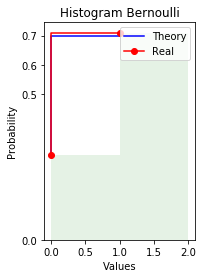

Pearson for Bernoulli:  0.4761904761904799  < 3.84 ?  True


In [17]:
sequence = bernoulli_with_mcm(p_bernoulli)

print("mean theorethical: ", bernoulli_mean_theory())
print("mean real: ", mean_real(sequence), '\n')

print("variance theorethical: ", bernoulli_variance_theory())
print("variance real: ", variance_real(sequence), '\n')

print("kurtosis theorethical: ", bernoulli_kurtosis_theory())
print("kurtosis real: ", kurtosis_real(sequence), '\n')

print("skewness theorethical: ", bernoulli_skewness_theory())
print("skewness real: ", skewness_real(sequence), '\n')

print("mean difference: ", abs(variance_real(sequence) - bernoulli_variance_theory()))
print("variance difference: ", abs(bernoulli_mean_theory() - mean_real(sequence)))
print("skewness difference: ", abs(skewness_real(sequence) - bernoulli_skewness_theory()))
print("kurtosis difference: ", abs(kurtosis_real(sequence) - bernoulli_kurtosis_theory()))

# the histogram of the data
num, bins, patches = plt.hist(sequence, bins=[0, 1, 1, 2], density=True, facecolor='green', alpha=0.1)
plt.title('Histogram Bernoulli')

plt.xlabel('Values')
plt.ylabel('Probability')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 1.0])
X = [0, 1]
Y = [1 - p_bernoulli, p_bernoulli]
plt.step(X, Y, label='Theory', color='b')
Y = [1 - mean(sequence), mean(sequence)] 
plt.step(X, Y, 'C0o', label='Real', color='r')

plt.subplots_adjust(left=0.55)
plt.legend()

plt.show()

p_test_bernoulli = pearson_simple(sequence, [1 - p_bernoulli, p_bernoulli])
print("Pearson for Bernoulli: ", p_test_bernoulli, ' < 3.84 ? ',  p_test_bernoulli < 3.84)
# ((0.62 - 0.7 * 1000) ^ 2 /1000/0.7 + (0.38 - 0.3 * 1000) ^ 2/1000 /0.3) 

mean theorethical:  0.5
mean real:  0.502 

variance theorethical:  0.5
variance real:  0.49449049049048854 

kurtosis theorethical:  2.0
kurtosis real:  1.9916883569821273 

skewness theorethical:  1.4142135623730951
skewness real:  1.407821952275999 

mean difference:  0.005509509509511457
variance difference:  0.0020000000000000018
skewness difference:  0.006391610097096212
kurtosis difference:  0.008311643017872683


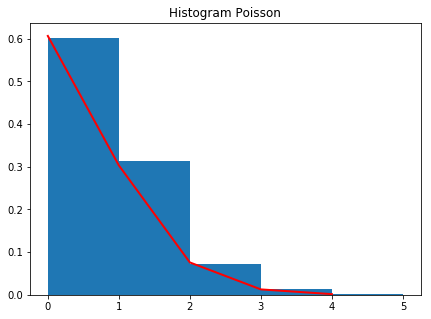

Max 4
Pearson for Poisson:  0.791298631152459  < 18.0 ?  True


In [21]:
l = 0.5
def poisson(l, n):
    e = math.exp(-l)
    for _ in range(n):
        a = random()
        k = 0
        while a >= e:
            a *= random()
            k += 1
        yield k

def poisson_mean_theory():
    return l

def poisson_variance_theory():
    return l

def poisson_kurtosis_theory():
    return l ** (-1)
                                                
def poisson_skewness_theory():
    return l ** (-0.5)  

sequence = list(poisson(l, n))

print("mean theorethical: ", poisson_mean_theory())
print("mean real: ", mean_real(sequence), '\n')

print("variance theorethical: ", poisson_variance_theory())
print("variance real: ", variance_real(sequence), '\n')

print("kurtosis theorethical: ", poisson_kurtosis_theory())
print("kurtosis real: ", kurtosis_real(sequence), '\n')

print("skewness theorethical: ", poisson_skewness_theory())
print("skewness real: ", skewness_real(sequence), '\n')

print("mean difference: ", abs(variance_real(sequence) - poisson_variance_theory()))
print("variance difference: ", abs(poisson_mean_theory() - mean_real(sequence)))
print("skewness difference: ", abs(skewness_real(sequence) - poisson_skewness_theory()))
print("kurtosis difference: ", abs(kurtosis_real(sequence) - poisson_kurtosis_theory()))

plt.figure(figsize=(7, 5))
plt.title('Histogram Poisson')
plt.hist(sequence, bins=5, range=(0, 5), density=1)
X = [i for i in range(0, max(sequence) + 1)]
Y = [(l ** k) * math.exp(-l) / math.factorial(k) for k in range(0, max(sequence) + 1)]
plt.plot(X, Y, linewidth=2, color='r')
plt.show()

print("Max", max(sequence))
p_test_poisson = pearson_simple(sequence, [(l ** k) * math.exp(-l) / math.factorial(k) for k in range(0, max(sequence) + 1)])

print("Pearson for Poisson: ", p_test_poisson, ' < 18.0 ? ',  p_test_poisson < 18.0)

mean theorethical:  9.0
mean real:  8.891 

variance theorethical:  89.99999999999999
variance real:  92.44756656656685 

kurtosis theorethical:  6.011111111111111
kurtosis real:  7.238643198224949 

skewness theorethical:  2.0027758514399734
skewness real:  2.1396859177057954 

mean difference:  0.10899999999999999
variance difference:  2.447566566566863
skewness difference:  0.13691006626582203
kurtosis difference:  1.227532087113838


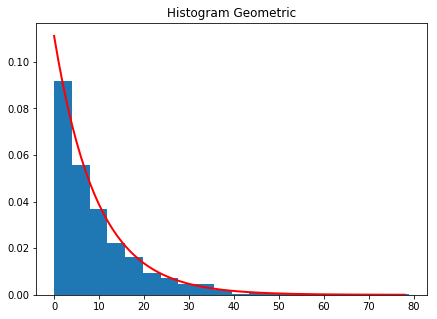

0.11111111111111112
Pearson for geometric:  32.56585524716692  < 43.8 ?  True


In [6]:
p = 0.1
def geometric(p, n):
    for _ in range(n):
        yield math.floor(math.log(random()) / math.log(1 - p))
    
def geometric_mean_theory():
    return (1 - p) / p

def geometric_variance_theory():
    return (1 - p) / (p ** 2)

def geometric_kurtosis_theory():
    return 6 + (p ** 2) / (1 - p)
                                                 
def geometric_skewness_theory():
    return (2 - p) / math.sqrt(1 - p)

sequence = list(geometric(p, n))

print("mean theorethical: ", geometric_mean_theory())
print("mean real: ", mean_real(sequence), '\n')

print("variance theorethical: ", geometric_variance_theory())
print("variance real: ", variance_real(sequence), '\n')

print("kurtosis theorethical: ", geometric_kurtosis_theory())
print("kurtosis real: ", kurtosis_real(sequence), '\n')

print("skewness theorethical: ", geometric_skewness_theory())
print("skewness real: ", skewness_real(sequence), '\n')

print("mean difference: ", abs(mean_real(sequence) - geometric_mean_theory()))
print("variance difference: ", abs(geometric_variance_theory() - variance_real(sequence)))
print("skewness difference: ", abs(skewness_real(sequence) - geometric_skewness_theory()))
print("kurtosis difference: ", abs(kurtosis_real(sequence) - geometric_kurtosis_theory()))

plt.figure(figsize=(7, 5))
plt.title('Histogram Geometric')
plt.hist(sequence, bins=20, range=(0, max(sequence) + 1), density=1)
X = [i for i in range(0, max(sequence) + 1)]
Y = [(1 - p) ** (k - 1) * p for k in range(0, max(sequence) + 1)]
plt.plot(X, Y, linewidth=2, color='r')
plt.show()

print(max([((1 - p) ** (k - 1)) * p for k in range(0, max(sequence) + 1)]))

m = max(sequence)
number_of_intervals = 30

l = math.floor(m / number_of_intervals) + 1
p_test_ge = pearson(sequence, number_of_intervals, [sum([p * (1 - p) ** (k + i) for i in range(0, l)]) for k in range(0, number_of_intervals * l, l)])

#p_test_ge = pearson_geometric(sequence)
print("Pearson for geometric: ", p_test_ge, ' < 43.8 ? ',  p_test_ge < 43.8)

mean theorethical:  15.0
mean real:  14.818 

variance theorethical:  60.0
variance real:  58.749625625625704 

kurtosis theorethical:  1.2166666666666666
kurtosis real:  1.4909964785001124 

skewness theorethical:  0.9036961141150639
skewness real:  1.0113729977848593 

mean difference:  0.18200000000000038
variance difference:  1.2503743743742959
skewness difference:  0.10767688366979544
kurtosis difference:  0.27432981183344585


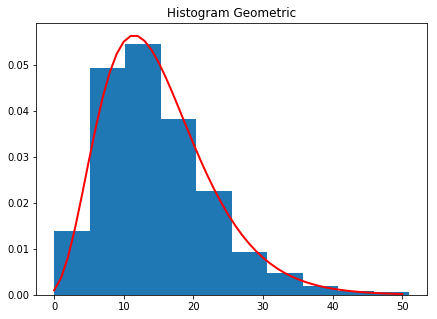

M2 50
Pearson for reverse_binomial:  7.3187837077919795  < 43.8 ?  True


In [20]:
m = 5
r = 5
p = 0.25

def combination(k, n):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

def reverse_binomial(m, p, n):
    p_copy = p
    for r in list(multiplicative_congruential_method(a, b, M, n)):
        q = 1 - p_copy
        p = p_copy ** m
        r = random()
        z = 0
        r = r - p
        while r > 0:
            z = z + 1
            p = p * q * (m - 1 + z) / z
            r = r - p 
        yield z

def reverse_binomial_2(m, p, n):
    for r in list([random() for _ in range(n)]):
        q = 1 - p
        c = 1 / math.log(1 - p)
        z = 0
        i = 1
        while i < m:
            x = math.floor(c * math.log(r))
            z = z + x
            i += 1
        yield z
        
def reverse_binomial_mean_theory():
    return r * (1 - p) / p

def reverse_binomial_variance_theory():
    return r * (1 - p) / (p ** 2)

def reverse_binomial_kurtosis_theory():
    return 6 / r + (p ** 2) / (r * (1 - p))
                                                 
def reverse_binomial_skewness_theory():
    return (2 - p) / math.sqrt((1 - p) * r)

sequence = list(reverse_binomial(m, p, n))

print("mean theorethical: ", reverse_binomial_mean_theory())
print("mean real: ", mean_real(sequence), '\n')

print("variance theorethical: ", reverse_binomial_variance_theory())
print("variance real: ", variance_real(sequence), '\n')

print("kurtosis theorethical: ", reverse_binomial_kurtosis_theory())
print("kurtosis real: ", kurtosis_real(sequence), '\n')

print("skewness theorethical: ", reverse_binomial_skewness_theory())
print("skewness real: ", skewness_real(sequence), '\n')

print("mean difference: ", abs(mean_real(sequence) - reverse_binomial_mean_theory()))
print("variance difference: ", abs(reverse_binomial_variance_theory() - variance_real(sequence)))
print("skewness difference: ", abs(skewness_real(sequence) - reverse_binomial_skewness_theory()))
print("kurtosis difference: ", abs(kurtosis_real(sequence) - reverse_binomial_kurtosis_theory()))

plt.figure(figsize=(7, 5))
plt.title('Histogram Geometric')
plt.hist(sequence, bins=10, range=(0, max(sequence) + 1), density=1)
X = [i for i in range(0, max(sequence) + 1)]
Y = [ combination(z, z + m - 1) * p ** m *(1 - p) ** z for z in range(0, max(sequence) + 1)]
plt.plot(X, Y, linewidth=2, color='r')
plt.show()

p_list = [combination(z, z + m - 1) * (p ** m) * ((1 - p) ** z) for z in range(0, n)]

m2 = max(sequence)
print("M2", m2)
number_of_intervals = 30
l = math.floor(m2 / number_of_intervals) + 1
p_test_reverse_binomial = pearson(sequence, number_of_intervals, [sum([combination(k + i, k + i + m - 1)  *(p ** m) * (1 - p) ** (k + i) for i in range(0, l)]) for k in range(0, number_of_intervals * l, l)])

print("Pearson for reverse_binomial: ", p_test_reverse_binomial, ' < 43.8 ? ',  p_test_reverse_binomial < 43.8)